#### Style Block
<style>
* { max-width = 800px; }
    
.column {
  float: left;
  width: 50%;
}

/* Clear floats after the columns */
.row:after {
  content: "";
  display: table;
  clear: both;
}
</style>

# Verkefni IIA
## Samanburður á tímaflækju aðgerða í þremur útfærslum af lyklasöfnum
### Höfundur: Erling Óskar Kristjánsson
<hr>
#### Námskeið: Greining Reiknirita
#### Umsjónarmaður: Hjálmtýr Hafsteinsson
#### Stofnun: Háskóli Íslands
#### Vor 2019
<hr>

## 1. Inngangur

Fyrirfinnast ýmiss konar gerðir af gagnagrindum sem nota má sem lyklasöfn. Margar hafa þær sína kosti og galla og geta nýst vel undir mismunandi kringumstæðum. Kostirnir geta falist í því að vera hraðvirk, einföld í útfærslu, áreiðanleg, eða nota lítið geymslupláss, svo dæmi séu nefnd.

Ein af þessum lyklasöfnum eru tvíleitartré og afbrigði þeirra, sem er frægt fyrir að vera hálfgerður _jack of all trades_, þar sem allar vinsælustu aðferðirnar á lyklasafnið nota $O(lg(n))$ í versta fall eða að jafnaði, sérstaklega svo framarlega sem tréið sé í jafnvægi. Í þessari skýrslu verður skoðað bæði venjulegt tvíleitartré og afbrigði þessi, sem á ensku kallast _Treap_, en verður hér nefnt Hrúgutré. Hrúgutré, eins og nafnið gefur til kynna, uppfyllir bæði skilyrði hrúgu, og trés. Útfærslan notast við slembitölugjafa til að úthluta hnútum forgang við innsetningu, og hnútar með hærri forgang færast ofar í tréið.

Raðaður beintengdur listi er svo annað lyklasafn sem er þó ekkert sérstaklega hraðvirkt, en með því að tengja saman nokkra raðaða beintengda lista þá má búa til aðra gagnagrind sem kallast á ensku _Skip List_, en verður hér kallað Skopplisti. Skopplisti virkar þannig að í grunninn er einn raðaður beintengdur listi með hnútum sem innihalda lykil og bendi til hægri. Svo eftir því sem listinn lengist er búinn til annar beintengdur listi þar sem hver hnútur hefur t.d. 50% líkur á að vera í þessum nýja lista fyrir ofan, sama gerist svo við þann lista þegar hann lengist, o.s.frv. Hver hnútur í þessum styttri aukalistum hefur svo bendi niður á þann hnút með sama lykil í listanum _fyrir neðan sig_. Afleiðing þessa er sú að leit verður mun sneggri, því það þarf ekki að ítra í gegnum allan upprunalega listann til að finna rétta staðsetningu, heldur er hægt að taka stór skref í efri listum og fara svo niður í neðri lista.

Hrúgutré og skopplistar hafa bæði þann eiginleika að nýta slembigjafa í hönnun sinni. Er áreiðanlegt að reiða sig á slembigjafa í hönnun lyklasafna? Hefur stærð gagnagrindanna áhrif á áreiðanleika þeirra?

### 1.1 Verkefnalýsing 
Í þessu verkefni verða útfærðar og bornar saman þrjár gagnagrindur til að útfæra lyklasöfn.

Gagnagrindurnar eru:

1. Tvíleitartré (_Binary Search Tree_)
2. Hrúgutré (_Treap_)
3. Skopplisti (_Skip List_)

Gagnagrindurnar verða útfærðar (e. _implemented_) í Python með aðgerðunum:

- Innsetning (`insert()`)
- Uppfletting/Leit (`contains()`)

Smíðaðar verða gagnagrindur og gögn.

Aðferðirnar verða svo tímamældar á eftirfarandi máta.

Innsetningin á $n_0=500$, $n_1=2500$ og $n_2=5000$ lyklum þar sem gildi lyklana verður $1, 3, 5, ..., 2n_i-1$ (s.s. oddatölur). Til þæginda verða lyklasöfnin gjarnan kölluð _lítið_, _meðalstórt_ og _stórt_ hér eftir, þó það gæti veitt gott innsæi að skoða bæði stærri og minni gagnagrindur, og þó $n_2=5000$ sé alls ekkert sérlega stórt.

Röðun lyklanna við innsetingu verður tvenns konar:

- Lyklarnir eru í slembiröð.
- Lyklarnir eru í hækkandi röð, burtséð frá $\frac{n_i}{10}$ handahófskenndum víxlunum (hér eftir: '~_hækkandi_ röð')

Fyrir hvora gerð af innsetningu verða svo framkvæmdar þrjár mismunandi tímamælingar á leit að $m_0=100.000$, $m_1=200.000$ og svo $m_2=400.000$ lyklum. Í öllum tilfellum verða allir lyklar jafnlíklegir til að verða fyrir leitinni, en ýmist verður

- Einungis leitið að lyklum sem eru í gagnagrindinni (s.s. oddatölum á bilinu $[1, 2n_i-1]$), eða
- Helmingur leitana verða að gildum sem eru ekki í gagnagrindinni (s.s. allar heiltölur á bilinu $[0, 2n_i]$).

Því má taka saman tímamælingar á leit í tilvikin:

- Slembin innsetning, allar leitir bera árangur
- Slembin innsetning, helmingur leitana árangurslaus
- Náröðuð innsetning, allar leitir bera árangur
- Náröðuð innsetning, helmingur leitana árangurslaus


Niðurstöður verða svo birtar í töflum og línuritum, og verða þær bornar saman og túlkaðar.

Verkefnið verður að öllu leiti unnið í Python og Jupyter, og allur kóði verður birtur og útskýrður.
<hr>

<hr>
## 2. Útfærsla á Gagnagrindum

Notast var við hlutbundna hönnun á öllum gagnagrindum og nóðum þeirra. Gagnagrindaklasarnir heita `Tree`, `Treap` og `SkipList`.

In [6]:
""""""""" global imports """""""""
import math, random, timeit
import numpy as np
import matplotlib.pyplot as plt

<hr>
### 2.1 Tvíleitartré
Tvíleitartré er klassísk lyklasafn. Styrkleiki tvíleitartrésins er sá að útfærslan er auðveld. Það þarf ekki að hafa sérstakan klasa fyrir tré með rót, og annan fyrir nóður, því rótin breytist aldrei (nema henni sé eytt, en þessi útfærsla bíður ekki upp á eyðingar). Ef tréið er í jafnvægi þá eru innsetningar- og leitartímar fyrirsjáanlegir.

In [7]:
# Tvíleitartré
class Tree:

    # Smiður
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

    # Innseting
    def insert(self, data):
        if self.data:
            if data < self.data:
                if self.left is None:
                    self.left = Tree(data)
                else:
                    self.left.insert(data)
            elif data > self.data:
                if self.right is None:
                    self.right = Tree(data)
                else:
                    self.right.insert(data)
        else:
            self.data = data

    # Uppfletting    
    def contains(self, key):
        if key < self.data:
            if self.left is None:
                return False
            return self.left.contains(key)
        elif key > self.data:
            if self.right is None:
                return False
            return self.right.contains(key)
        else:
            return True

<hr>
### 2.2 Hrúgutré
Hrúgutréið hefur sér klasa fyrir tréið sjálft þar sem haldið er utan um hvaða nóða er rót. Aðgerðir eru framkvæmdar á tréið, sem geymir nóður.

Hrúgutréið uppfyllir hrúguskilyrði þar sem nóður með hærri forgang (lægra gildi á `self.priority`) eru ofar í trénu. Útfærslan bíður ekki upp á að hægt sé að velja forgang á innsetta gildið, en í staðinn er framkölluð handahófskennd fleytitala á bilinu $[0,1)$ sem eru u.þ.b. $2^{53}$ ólík gildi, og líkurnar á að fá þá sömu tvisvar því gríðarlega litlar. Annars væri t.a.m. hægt að upphafsstilla mengi (Python `set`) af tölum við smíði trésins og fjarlægja gildi úr því mengi og nota sem forgang. Þetta mengi þyrfti þó að að vera að endanlegri stærð, sem myndi takmarka stærð trésins.

Leitin er mjög lík leitinni í tvíleitartré, fyrir utan að fyrst þarf að gá hvort hrúgutréið sé tómt, og ef ekki, þá skal hefja leit eins og í tvíleitartrénu út frá rótinni. Það lengir leitartíma örlítið, en hefur minni áhrif eftir því sem tréið verður stærra (því það verða fleiri aðgerðir í hverri leit og þessi eina aðgerð er hverfandi).

Sama á svo við um innsetningu í hrúgutréið, nema að þar þarf einnig að laga hrúguskilyrðin eftir hverja innsetningu. Því er haldið fram í bókinni að snúningarnir taki bara fastan tíma, en við munum sjá á tímamælingunum t.d. hvort innsetning á gildum með lyklum í slembinni röð sé þá raunverulega jafn snöggur í hrúgutréum og í tvíleitartréi.

In [8]:
class TreapNode():
    # Smiður nóðu
    def __init__(self, data, parent = None):
        self.data = data
        self.priority = random.random()
        self.parent = parent
        self.left = None
        self.right = None


class Treap():
    # Smiður hrúgutrés
    def __init__(self):
        self.root = None

    # Uppfletting
    def contains(self, data):
        if self.root is None:
            return False
        return self._contains(data, self.root)
    
    def _contains(self, data, r):
        if data < r.data:
            if r.left is None:
                return False
            return self._contains(data, r.left)
        elif data > r.data:
            if r.right is None:
                return False
            return self._contains(data, r.right)
        else:
            return True

    # Innsetning
    def insert(self, data):
        if self.root is None:
            self.root = TreapNode(data)
            return
        self._insert(data, self.root)
        
    def _insert(self, data, r):
        if data < r.data:
            if r.left is None:
                r.left = TreapNode(data, r)
                self._balance(r.left)
            else:
                self._insert(data, r.left)
        elif data > r.data:
            if r.right is None:
                r.right = TreapNode(data, r)
                self._balance(r.right)
            else:
                self._insert(data, r.right)
        else: # data == r.data
            return

    # laga hrúguskilyrði
    def _balance(self, s):
        while s.parent is not None and s.priority < s.parent.priority:
            if s.data < s.parent.data:
                self._rotate_right(s)
            else: # self.data > self.parent.data
                self._rotate_left(s)
        if s.parent is None:
            self.root = s
         
    def _rotate_right(self, s):
        p = s.parent
        g = p.parent
        if s.right is not None:
            s.right.parent = p
        if g is not None:
            if p is g.left:
                g.left = s
            else: # p is g.right
                g.right = s
        p.left = s.right
        s.parent = g
        p.parent = s
        s.right = p
                       
    def _rotate_left(self, s):
        p = s.parent
        g = p.parent
        if s.left is not None:
            s.left.parent = p
        if g is not None:
            if p is g.left:
                g.left = s
            else: # p is g.right
                g.right = s
        p.right = s.left
        s.parent = g
        p.parent = s
        s.left = p

<hr>
### 2.3 Skopplisti
Skopplistinn hefur þann kost að lág lyklagildi eru framarlega, en engu að síður er nokkuð hraðvirkt að finna hærri gildi.

Ókosturinn er sá að af þessum gagnagrindum reyndist hönnunin á skopplistanum vera mesta mausið (mögulega af því höfundur er vanari að hugsa um tré); oft hefði verið gott að hafa bendi upp á næsta lista fyrir ofan, og hefði það mögulega orðið hraðvirkara, en það brýtur skilgreininguna á skopplista. 

Það er einn annmarki í útfærslunni, en hann er í aðgerðinni `updateAbove`. Þar þarf stundum að ýtra um nokkur gildi í listanum fyrir neðan til að passa að hnúturinn bendi rétt niður, og getur þetta því aukið tímann örlítið fyrir hvera innsetningu. Þetta ætti að vera hjákvæmilegt, en höfundi tókst ekki að breyta þessari útfærslu skopplista án þess að þurfa að endursmíða hann frá grunni með hugmyndum annara. Engu að síður þá ætti þetta ekki að hafa áhrif á uppflettingartíma.

Í undirkafla 7.5 (aftast í skýrslunni) má finna `main()` aðferðir og fleiri til að skoða og prófa gagnagrindirnar. Sér í lagi var útfærð aðferðin `printSkiplist()` til að athuga að allir bendlar séu réttir, auk þess var bætt prent-skipunum inn í `insert()` og `contains()` til að ganga úr skugga um að leitin færi í rétta braut í hverri ítrun, og allt leit vel út. Þessar línur hafa einungis verið _kommentaðar_ út, til að auðvelda yfirferð.

In [9]:
class ListNode():
    
    def __init__(self, key, right, down=None):
        self.key = key
        self.right = right
        self.down = down


class SortedLinkedList():
    
    def __init__(self):
        self.tail = ListNode(math.inf, None)
        self.head = ListNode(-math.inf, self.tail)
        

class SkipList():

    def __init__(self):
        self.layers = 0
        self.sortedLists = [SortedLinkedList()]


    def contains(self, x):
        h = self.layers
        v = self.sortedLists[h].head
#        print('byrja leit á', x)
        while v is not None and v.key != x:
            if v.right.key > x:
#                a = str(v.down.key) if v.down is not None else 'None'
#                b = str(v.right.key) if v.right is not None else 'None'
#                print('fór niður úr hæð '+ str(h) + ' frá '+ str(v.key) + ' til ' + a + ' en til hægri er ' + b)
#                h-=1
                v = v.down
            else:
#                print('fór til hægri á hæð '+ str(h) + ' frá ' + str(v.key) + ' til ' + str(v.right.key))
                v = v.right
#            print()
        return v is not None and v.key == x


    def insert(self, x):
        h = self.layers
        L = self.sortedLists[h]
        v = L.head
        rVs = []
        while True: # Could put 'v.right.key == x' here instead of True
            if v.right.key < x:
                v = v.right
            elif v.down is not None:
                rVs.append(v)
                v = v.down
            elif v.right.key == x: # but fewer comparisons if kept here
                return
            else: # v.right.key > x and v.down is None. We are here!
                v.right = ListNode(x, v.right, v.down)
                self.updateAbove(x, rVs)
                break


    def updateAbove(self, x, rVs):
        i, n = 0, len(rVs)
        b = self.flipCoin() # flip coin
        while i < n and b: # add x to above layers
            rv = rVs[n-i-1]
            d = rv.down
            while x != d.key: # make sure x is pointing down to itself
                d = d.right
#            print(x, 'inserted with', d.key, 'below')
            rv.right = ListNode(x, rv.right, d)
            b = b and self.flipCoin()
            i+=1
        if i == n and b: # already added to top layer, add another?
            L = SortedLinkedList()
            L.head.down = self.sortedLists[self.layers].head
            L.tail.down = self.sortedLists[self.layers].tail
            self.layers += 1
            self.sortedLists.append(L)

    """ prentar hvern layer af listum L í SkipList á forminu:
        L[0].key (L[0].down.key) -> L[1] (L[1].down.key)...
    """
    def printSkipList(self):
        h = self.layers
        SL = self.sortedLists
        for i in range(h,-1,-1):
            L = SL[i]
            v = L.head
            l = ''
            d = ''
            while v is not None:
                d = str(v.down.key) if v.down is not None else ''
                l += str(v.key)  + ' (' + d + ') ' + '-> '
                v = v.right
            print(l)
        #    print(d)
            print()

    def flipCoin(self):
        return random.randint(0,1)==1

<hr>
## 3. Smíði gagna

Nú þarf að smíða gögn til að setja inn í gagnagrindurnar. Gögnin eru geymd í lista sem vísað er í þegar gögnin eru sett í gagnagrindurnar. Auðvelt væri að búa gögnin til jafnóðum og þau eru sett inn, en þetta er gert til að koma í veg fyrir að smíði gagna hafi áhrif á tímamælinguna meðan innsetningin á sér stað.

Á svipaðan máta eru búnir til sex mismunandi listar til að leita með, tveir fyrir hvert gildi á $n_0-n_2$, allir að lengd $m_2=400.000$. Þá er einfaldlega ítrað í gegnum $1/4$ og $1/2$ af listanum fyrir lægri gildi á $m_i$.

Leitað verður s.s. $100.000$ til $400.000$ sinnum í hverjum lista, en af stökum á bilinu $0$ til $1.000$, $5.000$ eða $10.000$ eftir tilviki. Því verður leitað mjög oft að hverri tölu. Leitarlistarnir eru stokkaðir (`shuffle`) en það hefur lítil áhrif því hver tala verður u.þ.b. jafn oft fyrir leitinni.

Skilgreinum hér víddir sem vísað er í. Allir kóðabútar eins og þessi merktur `Fjöldi mælinga` tilheyra einni einingu sem púsla má saman og keyra í heild til að herma verkefnið. Á `import` skipununum sést hvert þarf að sitja hvert fall sem birt verða í köflum.

```Python
""""""""""""""" local imports """""""""""""""
from Treap import Treap
from Tree import Tree
from SkipList import SkipList
from FunctionsV2 import SmidaInnsetningarLyklaLista, SmidaLeitarLyklaLista
from FunctionsV2 import MaelaInnsetningartima, MaelaLeitartima
from TablesV2 import TaflaLinuheiti, LeitartimaToflur, BirtaTofluHTML, BirtaToflurHTML
from GraphsV2 import GrafInnsetningartimi, GrafLeitartimi, GrafLeitartimi_mFast

""""""""""""""" Fjöldi mælinga """""""""""""""
k = 3
ns = [500, 2500, 5000]
ms = [100000, 200000, 400000]
f = 50 # fjöldi mælinga
```

<hr>
### 3.1 Föll til notkunar við gerð gagna 

In [11]:
""""""""" Búa til gögn fyrir innsetningu """""""""
def SmidaInnsetningarLyklaLista(Ss, Rs, ns):
    i = 0
    for n in ns:
        Ss.append(np.arange(1, 2*n+1, 2))
        Rs.append(np.copy(Ss[i]))
        random.shuffle(Ss[i])
        RandomVixlanir(Rs[i], n)
        i+=1

""""""""" Búa til gögn fyrir leit """""""""
""" Ef b þá verður búinn til heiltölulisti á bilinu [0,2n]
    en annars bara oddatölur """
def SmidaLeitarLyklaLista(m, ns, k, b):
    Ls = []
    for i in range(k):
        n = ns[i]
        a = np.arange(0, 2*n) if b else np.arange(1, 2*n+1, 2)
        Ls.append(a)
        while len(Ls[i]) < m:
            Ls[i] = np.concatenate((Ls[i], a))
        random.shuffle(Ls[i])
    return Ls
    
""" Framkvæmir n/10 staðsetningavíxlanir í listanum X """
def RandomVixlanir(X,n):
    for i in range(n//10):
        a, b = random.randint(0,n-1), random.randint(0,n-1)
        X[a], X[b] = X[b], X[a]

Gögnin eru svo upphafssett á eftirfarandi máta. Leitarlyklar eru einungis smíðaðir einu sinni, en innsetningargögn verða smíðuð í hverri ítrun eins og útskýrt verður rétt að neðan.

```Python
""""""""""""""" Listar undir innsetningartíma """""""""""""""
innsetningartimiTreeSlembid = np.zeros(3,dtype=float)
innsetningartimiTreeRadad = np.zeros(3,dtype=float)
innsetningartimiTreapSlembid = np.zeros(3,dtype=float)
innsetningartimiTreapRadad = np.zeros(3,dtype=float)
innsetningartimiSkipListSlembid = np.zeros(3,dtype=float)
innsetningartimiSkipListRadad = np.zeros(3,dtype=float)
# Og setja þá í lista til að geta vísað í þá eftir stuðlum

""""""""""""""" Listar undir leitartíma """""""""""""""
arangursrikurLeitartimiTreeSlembid = np.zeros((3,3),dtype=float)
arangursrikurLeitartimiTreeRadad = np.zeros((3,3),dtype=float)
arangursrikurLeitartimiTreapSlembid = np.zeros((3,3),dtype=float)
arangursrikurLeitartimiTreapRadad = np.zeros((3,3),dtype=float)
arangursrikurLeitartimiSkipListSlembid = np.zeros((3,3),dtype=float)
arangursrikurLeitartimiSkipListRadad = np.zeros((3,3),dtype=float)
arangurslitillLeitartimiTreeSlembid = np.zeros((3,3),dtype=float)
arangurslitillLeitartimiTreeRadad = np.zeros((3,3),dtype=float)
arangurslitillLeitartimiTreapSlembid = np.zeros((3,3),dtype=float)
arangurslitillLeitartimiTreapRadad = np.zeros((3,3),dtype=float)
arangurslitillLeitartimiSkipListSlembid = np.zeros((3,3),dtype=float)
arangurslitillLeitartimiSkipListRadad = np.zeros((3,3),dtype=float)

""" Smíða gögn til að leita að """
ArangursrikirLyklar = SmidaLeitarLyklaLista(ms[2], ns, k, False)
ArangurslitlirLyklar = SmidaLeitarLyklaLista(ms[2], ns, k, True)
```

### 3.2 Föll til notkunar við leit

Notast er við eininguna (e. _module_) `timeit` sem notar `time.perf_counter()` (`perf` fyrir _performance_), sem skilar fleytitölu og er nákvæmasti kosturinn í stuttar mælingar samkvæmt [Python Docs](https://docs.python.org/3/library/time.html#time.perf_counter). Mælingin inniheldur tímann sem líður þegar þráðurinn sefur, en það sýnir góða mynd af notkun í raunveruleikanum. Þetta er svipað og að taka mismun á tveimur mælingum af tímanum sem hefur liðið síðan _epoch_, en `timeit.timeit()` á að vera nákvæmari sér í lagi á Windows stýrikerfum. Að auki þá er aðferðin gríðarlega þægileg í notkun.

Mælingin á innsetningartímanum útskýrir sig svolítið sjálf og með hjálp fallslýsingarinnar.

Mælingin á leitartímanum fer þannig fyrir sig að ítrað er yfir `i` frá $0$ til $k=3$ sem er fjöldi gagnagrinda sem á að leita í.
- Hver slík gagnagrind `DSs[i]` getur til dæmis verið `Treap()` með $n_i$ lyklum sem voru settir inn í slembinni röð.
- Fyrst eru framkvæmdar leitir að fyrstu $100.000$ stökunum í `Xs[i]`, og það gildi bætt við töluna í listasætinu `Timi[i][0]`, svo er leitað að næstu $100.000$ stökunum í `Xs[i]`, og það gildi lagt við fyrra tímagildi og bætt við töluna í listasætinu `Timi[i][1]`, og að lokum síðustu $200.000$ stökin og tíminn lagður við og bætt við tímann listasætinu `Timi[i][2]`. 
- Í módúlnum sem sér um að kalla á þetta falla er skilgreind breitan `f`$=50$, sem táknar fjölda tímamælinga. Tímanum verður því deilt með $50$ til að ákvarða meðal leitartíma á $50$ mælingum.

In [13]:
""" Tímamæla innsetningar    # Lýsing m.v. **k = 3**
DSs: Listi með 3 gagnagrindum af sömu gerð
Xs: Listi með 3 listum (af lengdum ns) með sömu gerð af röðun gagna
Timi: Listi með 3 stökum sem halda utan um tíma sem hafa farið í sérhverja aðgerð hingað til
"""
def MaelaInnsetningartima(DSs, Xs, k, Timi):
    for i in range(k):
        Timi[i] += timeit.timeit("for x in Xs[i]: DSs[i].insert(x)", 
            globals=locals(), number=1)

""" Tímamæla leit
Fyrir:  k er fjöldi gagnagrinda (sem á að leita í)
        DSs er k-staka listi af gagnagrindum
        Xs er k-staka listi af listum af lyklum
        ms er 3ja staka talnalisti (fjöldi leitanna)
Eftir:  Timi er listi af listum
        Timi[i] inniheldur tímann fyrir ms[0], ms[1] og ms[2] leitanir í DSs[i]
"""
def MaelaLeitartima(DSs, Xs, ms, k, Timi):
    for i in range(k): # fyrir sérhverja stærð af gagnagrind n0, n1 og n2
        t = timeit.timeit("for j in range(ms[0]): DSs[i].contains(Xs[i][j])",
                   globals=locals(), number=1)
        Timi[i][0] += t # fyrstu 100.000 leitanir
        t += timeit.timeit("for j in range(ms[0],ms[1]): DSs[i].contains(Xs[i][j])",
                    globals=locals(), number=1)
        Timi[i][1] += t # fyrstu 200.000 leitanir
        t += timeit.timeit("for j in range(ms[1],ms[2]): DSs[i].contains(Xs[i][j])",
                    globals=locals(), number=1)
        Timi[i][2] += t # fyrstu 400.000 leitanir

<hr>
### 3.3 Framkvæma tímamælingar

Eftirfarandi eining er endurtekin `f`$=50$ sinnum. Tími hverrar mælingar er alltaf lagður við tímann sem hefur farið í þá mælingu, og að lokum er þeim öllum deilt með $50$. Ástæðan fyrir valinu á `f` voru frávik í mælingum þegar þetta var einungis endurtekið einu sinni eða þrisvar. Stundum getur maður verið einstaklega óheppin með þessar $n/10$ handahófskenndu víxlanir í `RadadirLyklar` sem eru s.s. í ~_hækkandi_ röð, og það bitnar þá mest á tvíleitartréunum og aðeins á skopplistunum. Til að fá hugmynd um hversu vel hver gagnagrind stendur sig að jafnaði í raunveruleikanum þá er mikilvægt að framkvæma margar mælingar og taka meðaltal þeirra.

```Python
""" Mælingar geta hafist """
for i in range(f):
    """ Smíða gögn til innsetningar """
    SlembnirLyklar = []
    RadadirLyklar = []
    SmidaInnsetningarLyklaLista(SlembnirLyklar, RadadirLyklar, ns)
    
    """"""""""""""" Mælingar á innsetningartíma """""""""""""""
    """ Setja gögn í gagnagrindur """
    TreeS = [Tree(SlembnirLyklar[0][0]), Tree(SlembnirLyklar[1][0]), Tree(SlembnirLyklar[2][0])]
    TreeR = [Tree(RadadirLyklar[0][0]), Tree(RadadirLyklar[1][0]), Tree(RadadirLyklar[2][0])]
    MaelaInnsetningartima(TreeS,SlembnirLyklar,k,innsetningartimiTreeSlembid)
    MaelaInnsetningartima(TreeR,RadadirLyklar,k,innsetningartimiTreeRadad)
    
    TreapS = [Treap(),Treap(),Treap()]
    TreapR = [Treap(),Treap(),Treap()]
    MaelaInnsetningartima(TreapS,SlembnirLyklar,k,innsetningartimiTreapSlembid)
    MaelaInnsetningartima(TreapR,RadadirLyklar,k,innsetningartimiTreapRadad)
    
    SkipListS = [SkipList(), SkipList(), SkipList()]
    SkipListR = [SkipList(), SkipList(), SkipList()]
    MaelaInnsetningartima(SkipListS,SlembnirLyklar,k,innsetningartimiSkipListSlembid)
    MaelaInnsetningartima(SkipListR,RadadirLyklar,k,innsetningartimiSkipListRadad)
    
    """"""""""""""" Mælingar á leitartíma """""""""""""""
    """ Leitad ad lyklum sem eru i gagnagrindunum """
    MaelaLeitartima(TreeS, ArangursrikirLyklar, ms, k, arangursrikurLeitartimiTreeSlembid)
    MaelaLeitartima(TreeR, ArangursrikirLyklar, ms, k, arangursrikurLeitartimiTreeRadad)
    
    MaelaLeitartima(TreapS, ArangursrikirLyklar, ms, k, arangursrikurLeitartimiTreapSlembid)
    MaelaLeitartima(TreapR, ArangursrikirLyklar, ms, k, arangursrikurLeitartimiTreapRadad)
    
    MaelaLeitartima(SkipListS, ArangursrikirLyklar, ms, k, arangursrikurLeitartimiSkipListSlembid)
    MaelaLeitartima(SkipListR, ArangursrikirLyklar, ms, k, arangursrikurLeitartimiSkipListRadad)

    """ Leitad ad lyklum þar sem helmingur er i gagnagrindunum """
    MaelaLeitartima(TreeS, ArangurslitlirLyklar, ms, k, arangurslitillLeitartimiTreeSlembid)
    MaelaLeitartima(TreeR, ArangurslitlirLyklar, ms, k, arangurslitillLeitartimiTreeRadad)
    
    MaelaLeitartima(TreapS, ArangurslitlirLyklar, ms, k, arangurslitillLeitartimiTreapSlembid)
    MaelaLeitartima(TreapR, ArangurslitlirLyklar, ms, k, arangurslitillLeitartimiTreapRadad)
    
    MaelaLeitartima(SkipListS, ArangurslitlirLyklar, ms, k, arangurslitillLeitartimiSkipListSlembid)
    MaelaLeitartima(SkipListR, ArangurslitlirLyklar, ms, k, arangurslitillLeitartimiSkipListRadad)


""" Deila tímamælingum með fjölda tímamælinga """
innsetningartimiTreeSlembid *= (1/f)
innsetningartimiTreeRadad *= (1/f)
innsetningartimiTreapSlembid *= (1/f)
innsetningartimiTreapRadad *= (1/f)
innsetningartimiSkipListSlembid *= (1/f)
innsetningartimiSkipListRadad *= (1/f)

arangursrikurLeitartimiTreeSlembid *= (1/f)
arangursrikurLeitartimiTreeRadad *= (1/f)
arangursrikurLeitartimiTreapSlembid *= (1/f)
arangursrikurLeitartimiTreapRadad *= (1/f)
arangursrikurLeitartimiSkipListSlembid *= (1/f)
arangursrikurLeitartimiSkipListRadad *= (1/f)
arangurslitillLeitartimiTreeSlembid *= (1/f)
arangurslitillLeitartimiTreeRadad *= (1/f)
arangurslitillLeitartimiTreapSlembid *= (1/f)
arangurslitillLeitartimiTreapRadad *= (1/f)
arangurslitillLeitartimiSkipListSlembid *= (1/f)
arangurslitillLeitartimiSkipListRadad *= (1/f)
```

Það er gott að setja tímamælingarnar í lista sem er auðvelt að vísa í, sérstaklega nú þegar gögnin eru tilbúin. Gerum það.

```Python
IT = [innsetningartimiTreeSlembid
, innsetningartimiTreeRadad
, innsetningartimiTreapSlembid
, innsetningartimiTreapRadad
, innsetningartimiSkipListSlembid
, innsetningartimiSkipListRadad]

LT = [arangursrikurLeitartimiTreeSlembid
, arangursrikurLeitartimiTreeRadad
, arangursrikurLeitartimiTreapSlembid
, arangursrikurLeitartimiTreapRadad
, arangursrikurLeitartimiSkipListSlembid
, arangursrikurLeitartimiSkipListRadad
, arangurslitillLeitartimiTreeSlembid
, arangurslitillLeitartimiTreeRadad
, arangurslitillLeitartimiTreapSlembid
, arangurslitillLeitartimiTreapRadad
, arangurslitillLeitartimiSkipListSlembid
, arangurslitillLeitartimiSkipListRadad]
```

Forritið var hins vegar keyrt (með `f`$=50$) í Spyder og gögnin flutt út með einingunni `pickle`, og flutt inn í Jupyter með eftirfarandi kóðabút, sem er ekki hluti af forritinu.

In [25]:
import pickle 
with open('50f.pickle', 'rb') as f:
    IT, LT, LinuheitiInnsetning, LinuheitiLeit, ns, ms, k = pickle.load(f)
    
# Notað í línurit
LTarangursrikurS = [LT[0],LT[2],LT[4]]
LTarangursrikurR = [LT[1],LT[3],LT[5]]
LTarangurslitillS = [LT[6],LT[8],LT[10]]
LTarangurslitillR = [LT[7],LT[9],LT[11]]

<hr>
## 4. Birting mælinga í töflum
##### Föll til að breyta listum í töflur og birta þær má finna í undirkafla 7.1

Með þeim aðferðum eru smíðaðar eftirfarandi töflur. Þær eru svo birtar og túlkaðar í kafla 4.

In [26]:
""""""""" Búa til töflur """""""""
TaflaInnsetningartimiSlembid = TaflaLinuheiti(LinuheitiInnsetning,[ns,IT[0],IT[2],IT[4]])
TaflaInnsetningartimiRadad = TaflaLinuheiti(LinuheitiInnsetning,[ns,IT[1],IT[3],IT[5]])
TaflaArangursrikurLeitartimiSlembid = LeitartimaToflur(LinuheitiLeit, [LT[0], LT[2], LT[4]],ms)
TaflaArangursrikurLeitartimiRadad = LeitartimaToflur(LinuheitiLeit, [LT[1], LT[3], LT[5]],ms)
TaflaArangurslitillLeitartimiSlembid = LeitartimaToflur(LinuheitiLeit, [LT[6], LT[8], LT[10]],ms)
TaflaArangurslitillLeitartimiRadad = LeitartimaToflur(LinuheitiLeit, [LT[7], LT[9], LT[11]],ms)

<hr>
### 4.1 Birting á töflum
#### 4.1.1 Innsetningartími

In [27]:
BirtaTofluHTML(TaflaInnsetningartimiSlembid, "Tafla 1: Lyklar settir inn í slembiröð")
BirtaTofluHTML(TaflaInnsetningartimiRadad, "Lyklar settir inn í <i>~hækkandi</i> röð")

Fjöldi innsetninga,500,2500,5000
Tvíleitartré,0.0012446,0.00805619,0.0176823
Hrúgutré,0.00199833,0.0119704,0.0259311
Skopplisti,0.00377574,0.0200113,0.041654


Fjöldi innsetninga,500,2500,5000
Tvíleitartré,0.00338873,0.0229061,0.051469
Hrúgutré,0.00190274,0.0115455,0.0244053
Skopplisti,0.00423993,0.0228196,0.0480201


Það tekur rétt rúmlega tvöfalt lengri tíma að setja inn 5000 gildi en 2500 gildi í öllum tilfellum. Einnig tekur rúmlega fimmfalt lengri tíma að setja inn 2500 en 500 gildi. Þetta er eins og búast mátti við, því innsetning tekur lengri tíma eftir því sem gagnagrindirnar stækka, alltaf í hlutfalli við stærð gagnagrindanna. Það sem stendur mest út úr er að innsetning í tvíleitartré tekur u.þ.b. tvöfalt lengri tíma ef lyklarnir eru raðaðir í ~_hækkandi_ röð við innsetningu. Þessar raðanir hafa lítil áhrif á skopplistann og hrúgutréið, en hið síðarnefnda virðist jafnvel græða (pínu pínu lítið) á að lyklarnir séu **ekki** í slembinni röð!

Innsetning slembiraðaðra lykla í hrúgutréin er tekur um $33-40\%$ meiri tíma en í venjulegu tvíleitartréin. Það sem veldur þessu er að það þarf að setja gildin inn sem lauf, og framkvæma snúninga í hrúgutrénu til að viðhalda hrúguskilyrðunum. Þetta gerir það að verkum að tvíleitartréið hefur lægsta innsetningartímann á lyklum í slembinni röð, sem er einmitt ummerki um að slembiröðun lyklanna fyrir innsetningu (sem tekur $O(n)$ tíma með [Fisher-Yates](https://en.wikipedia.org/wiki/Fisher%E2%80%93Yates_shuffle)) sé nóg til að gera tvíleitartréið að góðum kosti fyrir gagnagrind sem á ekki að breyta. Sér í lagi ef það heldur þessum hraða við leit, sem kemur í ljós von bráðar. 

Skopplistinn er hér slakastur, en hann hefur ennþá tækifæri til að sanna sig. Innsetning á litlum gildum í skopplistanum ætti hins vegar að taka skemmri tíma en innsetning á stórum gildum (því hann er raðaður í hækkandi röð), svo það hefði verið áhugavert að skoða líka innsetningartíma lykla í ~_lækkandi_ röð. Það er auðvelt verkefni að smíða forrit sem prófar það út frá þessu verkefni: Í raun þarf bara að láta fallið `RandomVixlanir` beita viðsnúningsfalli á listann.

<hr>
#### 4.1.2 Leitartími 
#### Einungis leitað að lyklum sem eru í gagnagrindunum

In [29]:
display(HTML("<h5>" + "Tafla 2: Gagnagrindur með <i>n</i> lyklum sem voru settir inn í slembinni röð" + "</h5>"))
BirtaToflurHTML(TaflaArangursrikurLeitartimiSlembid, ns, "n=%d")

Fjöldi leita,100000,200000,400000
Tvíleitartré,0.206306,0.412309,0.827776
Hrúgutré,0.23311,0.465792,0.9359
Skopplisti,0.595609,1.19045,2.38019


Fjöldi leita,100000,200000,400000
Tvíleitartré,0.274757,0.548968,1.09607
Hrúgutré,0.316126,0.632202,1.26123
Skopplisti,0.66026,1.32305,2.6428


Fjöldi leita,100000,200000,400000
Tvíleitartré,0.305942,0.611225,1.21871
Hrúgutré,0.342439,0.684055,1.37671
Skopplisti,0.702961,1.40731,2.81013


Hér sést að leit í tvíleitartré tekur minnstan tíma ef lyklarnir eru settir inn í slembinni röð. Þetta kemur lítið á óvart. Það er einmitt styrkleiki tvíleitartrésins: að aðgerðir eru fljótlegar vegna lítils innviðis. Sér í lagi er minna innviði í tvíleitartrénu en í hrúgutrénu, og hér sjáum við nefnilega áhrif þessarar einu auka aðgerðar í hverri leit í hrúgutrénu: að það þarf að gá hvort tréið sé tómt, og hefja leit frá rótinni. Sú eina aðgerð ætti þó ekki að duga til að valda þessum $10-20\%$ mun. Það er möguleiki að Fisher-Yates stokkunin á inntaksgildunum dugi til að setja tvíleitartréið í ennþá betra jafnvægi en slembitölugjafinn og hrúguskilyrðin í hrúgutrénu gera fyrir hrúgutréið. Það væri áhugavert að skoða leitartíma í minni tréum, þar sem þessi eina auka aðgerð verður stærra hlutfall af heildarfjölda aðgerða í hverri leit.

Hér má þá draga þá ályktun að svo framarlega sem það er vitað að gögnin verði í slembinni röð þegar þau verða sett inn, og að einungis verði leitað að lyklum sem eru í lyklasafninu, þá hentar venjulegt tvíleitartré best þessara þriggja.

Hingað til þá virðist útfærsla höfunds af skopplista vera vonlaus í samanburði við hinar.

In [30]:
display(HTML("<h5>" + "Tafla 3: Gagnagrindur með <i>n</i> lyklum sem voru settir inn í ~hækkandi röð" + "</h5>"))
BirtaToflurHTML(TaflaArangursrikurLeitartimiRadad, ns, "n=%d")

Fjöldi leita,100000,200000,400000
Tvíleitartré,0.59498,1.19147,2.38808
Hrúgutré,0.232397,0.464073,0.928361
Skopplisti,0.604776,1.20815,2.41456


Fjöldi leita,100000,200000,400000
Tvíleitartré,0.815328,1.63337,3.26864
Hrúgutré,0.305966,0.611241,1.22195
Skopplisti,0.673395,1.34918,2.6988


Fjöldi leita,100000,200000,400000
Tvíleitartré,0.911207,1.82544,3.65138
Hrúgutré,0.336693,0.672402,1.34618
Skopplisti,0.721086,1.44344,2.88886


Tvíleitartré eru hins vegar vonlaus þegar lyklar hafa verið settir inn í ~_hækkandi_ röð, og það sannar sig á þessum mælingum. Það er meira að segja sneggra að fletta upp í skopplistum en í tvíleitartréum undir þessum kringumstæðum, að minnstu útgáfunum undanskildum. Það er eins og vænta má, því þessi tvíleitartré eru í raun í laginu eins og næstum því raðaðir beintengdir listar, með nokkrum frávikum. Skopplistinn er svo einmitt raðaður beintengdur listi, með nokkrum flýtileiðum. Hér eru því loks að koma fram kostir skopplistans fram yfir tvíleitartréið, þar sem uppflettitími skopplistans er lægri en hjá tvíleitartréinu fyrir $n=2500$ og $n=5000$ staka gagnagrindur.

#### Helmingur leita er að lyklum sem eru ekki í gagnagrindunum

In [31]:
display(HTML("<h5>" + "Tafla 4: Gagnagrindur með <i>n</i> lyklum sem voru settir inn í slembinni röð." + "</h5>"))
BirtaToflurHTML(TaflaArangurslitillLeitartimiSlembid, ns, "n=%d")

Fjöldi leita,100000,200000,400000
Tvíleitartré,0.216135,0.431537,0.862903
Hrúgutré,0.243389,0.486371,0.974535
Skopplisti,0.606416,1.21481,2.42702


Fjöldi leita,100000,200000,400000
Tvíleitartré,0.28415,0.56707,1.13385
Hrúgutré,0.326143,0.651654,1.30164
Skopplisti,0.670044,1.34156,2.68228


Fjöldi leita,100000,200000,400000
Tvíleitartré,0.313506,0.627529,1.25609
Hrúgutré,0.355265,0.7121,1.42793
Skopplisti,0.716227,1.43114,2.8603


Leitartíminn er mjög svipaður hvort sem leitin bar árangur eða ekki. Þetta er sjálfsagt vegna þess að það tekur jafn langan tíma að athuga hvort t.d. lykillinn $800$ sé í gagnagrindinni, eins og $801$, hvort sem þeir eru þar eða ekki, ef gagnagrindin inniheldur oddatölur á bilinu $[1,801+]$. Hins vegar hefði skopplistinn fengið betra tækifæri til að láta ljós sitt skína ef leitað hefði verið að neikvæðum stökum (sem eru ekki í gagnagrindunum), því þar sem skopplistinn er raðaður í hækkandi röð, þá væri hann fljótur að útiloka slíkt.

Tölurnar eru því skiljanlega nauðalíkar þeim í Töflu 1, almennt aðeins um $1-2\%$ hærri.

In [32]:
display(HTML("<h5>" + "Tafla 5: Gagnagrindur með <i>n</i> lyklum sem voru settir inn í ~hækkandi röð" + "</h5>"))
BirtaToflurHTML(TaflaArangurslitillLeitartimiRadad, ns, "n=%d")

Fjöldi leita,100000,200000,400000
Tvíleitartré,0.613018,1.23213,2.44826
Hrúgutré,0.242445,0.484673,0.969702
Skopplisti,0.616744,1.23401,2.46913


Fjöldi leita,100000,200000,400000
Tvíleitartré,0.828604,1.66114,3.32509
Hrúgutré,0.315804,0.632272,1.26586
Skopplisti,0.68461,1.37072,2.74502


Fjöldi leita,100000,200000,400000
Tvíleitartré,0.929417,1.85551,3.70428
Hrúgutré,0.347354,0.69438,1.3886
Skopplisti,0.736139,1.46992,2.94107


Tvíleitartréið heldur áfram að standa sig illa við svona óákjósanlega röðun gilda við innsetningu. Skopplistinn er hér meira að segja orðinn vænlegri kostur fyrir litlar gagnagrindur. Hrúgutréið lætur ekkert á sig fá, og reynist vera gríðarlega áreiðanlegt, óháð röðun gilda við innsetningu eða árangurstíðni leita.

Engu að síður er útkoman mjög lík þeirri í Töflu 3.

<hr>
## 5. Línurit og frekari túlkun á niðurstöðum
Myndræn framsetning er gagnleg til að túlka niðurstöður betur. Þar er oft auðveldara að sjá hvað er líkt og hvað er ólíkt í mælingunum.

##### Aðferðir notaðar til að gera línurit má finna í undirkafla 7.2

Það er lítið áhugavert við þær aðferðir, nema að það eru teiknaðir inn á þau tveir ferlar: einn línulegur og hinn logri, til samanburðar við niðurstöður úr mælingum. Á þeim hafa einnig verið _kommentaðar_ út prentskipanir sem geta nýst til að ganga úr skugga um að verið sé að teikna réttan feril.

### 5.1 Birting á línuritum
#### 5.1.1 Innsetningartími

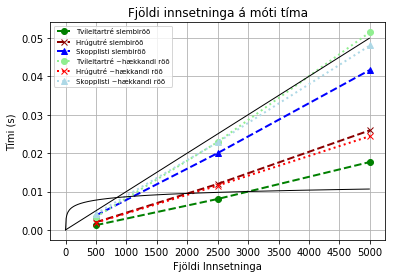

In [62]:
GrafInnsetningartimi(LinuheitiInnsetning,[IT[0], IT[2], IT[4]],[IT[1], IT[3], IT[5]], k, ns)

Efri svarti ferillinn er línulega fallið $f(x) = x/100.000$. Hér sést greinilega að innsetning ~_hækkandi_ gilda í tvíleitartré tekur u.þ.b. línulegan tíma, eins og vænta mátti, þar sem það er næstum því í laginu eins og raðaður beintengdur listi. Skopplistinn er næstum því jafn slæmur, en innsetningartíminn í skopplistann virðist vaxa eins og $x/130.000$, en stuðullinn lækkar hallatölu línunnar. Hinir innsetningatímarnir virðast einnig vaxa línulega, en með lægri stuðul. 

Neðri svarti ferillinn er lografallið $g(x) = ln(x)/800$, sem virðist vaxa talsvert hægar en hinir ferlarnir. Það eru smá vonbrigði, en mögulega mætti finna logra sem vex hraðar með annari grunntölu eða öðrum stuðli. Það er ýmislegt sem getur valdið því t.d. að innsetningartíminn er í tölvu sé ekki raunverulega af stærðargráðunni $O(log(n))$. T.d. úthlutaði tölvan einungis um 30% af örgjörvaaflinu til keyrslu forritsins, og jafnvel þau 30% deilast með öðrum þráðum sem ku vera í vinnslu. Hvernig sem viðrar þá eru þræðir sem eru í keyrslu stundum svæfðir í nokkrar millisekúndur (ms) því Windows eins og fleiri stýrikerfi nota [Round Robin CPU Scheduling](https://en.wikipedia.org/wiki/Round-robin_scheduling), þar sem þræði er úthlutað svokallaða _time slice/quantum_ sem er gjarnan 40-100ms í senn. Það þýðir að margar þessar aðgerðir voru framkvæmdar á 5 til 120 tímaskömmtum. Eins og áður var nefnt þá eru það fjöldi aðgerða við innsetningu sem er í hlutfalli við $lg(n)$, en tíminn í tölvu getur verið aðeins öðruvísi. Áhugavert væri að prófa aðrar tímamælinga aðferðir sem telja ekki með svefntíma þráða með, þó flestar heimildir hafi mælt með `timeit`.

Enn fremur þá eru útfærslur gagnagrindanna eru ekki óaðfinnanlegar. Sérstaklega ekki skopplistinn. 

Aðal málið er þó væntanlega að hér er ekki verið að bera saman innsetningartíma í gagnagrind sem inniheldur t.d. 5000 stök við aðra sem inniheldur 2500, heldur er verið að bera saman tímann sem það tekur að setja helmingi fleiri stök í gagnagrind. Það er augljóst að það tekur u.þ.b. tvöfalt meiri tíma. Það sem væri verðugast að skoða væri mismunur tímans, sem sést þó ágætlega hér, að í engri að þessum gagnagrindum virðist taka mikið meira en tvöfalt meiri tíma að setja tvöfalt fleiri stök inn, sem þýðir að innsetningartíminn í hlutfalli við stærð gagnagrindarinnar vex lítið eftir því sem gagnagrindirnar stækka.

<hr>
#### 5.1.1 Leitartími
##### 5.1.1.1 Á næstu þremur gröfum er einungis leitað að lyklum sem eru í gagnagrindunum: Árangursrík leit.

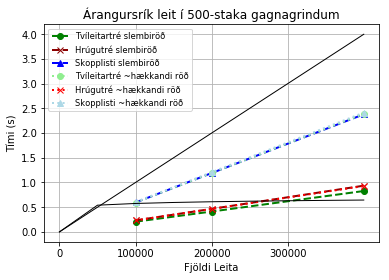

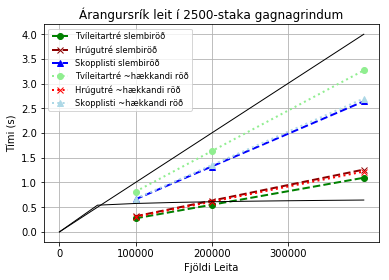

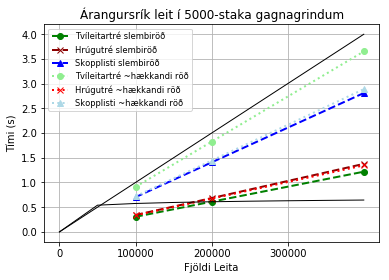

In [63]:
for j in range(k): # Teiknum gröf af árangursríkri leit fyrir hvert n
    GrafLeitartimi(LinuheitiLeit, LTarangursrikurS, LTarangursrikurR, k, ms, ns,
               'Árangursrík leit í %d-staka gagnagrindum',j,j)

Hér sést enn betur að það er álíka hraðvirkt að leita í tvíleitartrjám sem upplifðu innsetningu slembiraðaðra og í hrúgutréum. Ferlar hrúgutré sem voru hlaðin með slembiröðuðum gildum (dökkrauð brotalína) sést varla á neinu grafinu, því þær eru undir ljósrauðu punktalínunum, sem tákna leitartíma í hrúgutrjám þar sem röðun lykla við innsetningu var í ~_hækkandi_ röð. Þetta sýnir enn betur hvað hrúgutréið er áreiðanleg gagnagrind til að nota sem lyklasafn, því leitar- og innsetningartími virðist að mestu leiti óháður röðun lyklanna við innsetningu.

Leitartíminn í skopplistunum er einnig svipaður hvernig sem röðun gilda var við innsetningu (bláu ferlarnir). Það kemur í raun ekkert annað til greina, því röðunin á neðsta raðaða listanum er ótvíræð eftir innsetningu sömu gilda, og efri listarnir ættu að vera svipað langir, þó tilvist þeirra sé ákvörðuð með slembigjafa.

Leitartíminn á tvíleitartrjám sést ekki á $n=500$ grafinu, vegna þess að hann er undir báðum skopplistaferlunum (ótrúlegt en satt!). Þetta má staðfesta með því að skoða gildin í Töflu 5 að ofan. Eins og sést milli grafa þá vex leitartíminn í þessum gagnagrindum mest eftir því sem gagnagrindurnar stækka.

<hr>
##### 5.1.1.1 Á næstu þremur gröfum er helmingur leita að lyklum sem eru ekki í gagnagrindunum: Hálf-árangurslaus leit.

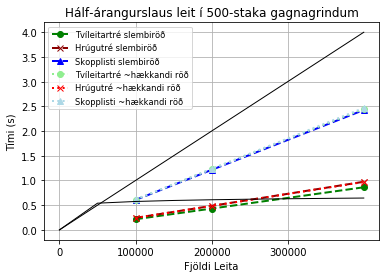

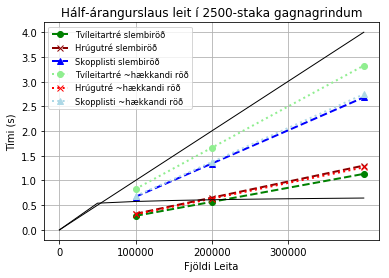

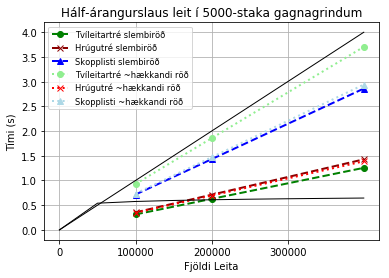

In [64]:
for j in range(k): # Teiknum gröf af árangurslítilli leit fyrir hvert n
    GrafLeitartimi(LinuheitiLeit, LTarangurslitillS, LTarangurslitillR, k, ms, ns,
               'Hálf-árangurslaus leit í %d-staka gagnagrindum', j, k+j)

Niðurstöður eru sláandi líkar þeim þegar einungis er leitað að stökum sem eru í gagnagrindunum. Ástæðan er augljós, eins og útskýrt er fyrir neðan Töflu 4 í fjórða kafla.

Skoðum því næst leitartíma í hlutfalli við stærð gagnagrindar.

<hr>
##### Á næstu þremur gröfum er einungis skoðuð árangursrík leit
###### Niðurstöður úr hálf-árangurslausri leit eru keimlíkar 

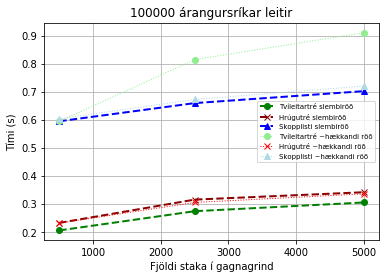

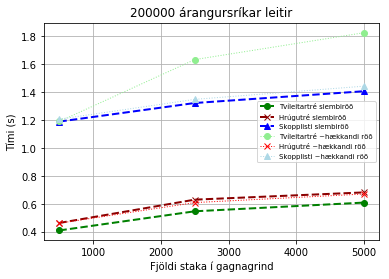

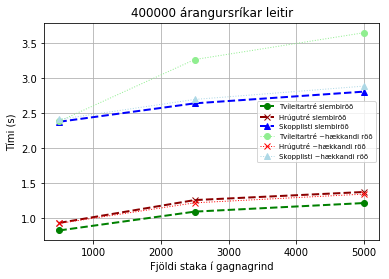

In [67]:
for j in range(k): # Teiknum gröf af árangursríkri leit fyrir n með fast m
    GrafLeitartimi_mFast(LinuheitiLeit, LTarangursrikurS, LTarangursrikurR, k, ms, ns,
               '%d árangursríkar leitir',j,2*k+j)

Frá þessu sjónarhorni sést loksins að leitartíminn eykst í lograhlutfalli við stærð gagnagrindanna. Þetta virðist gilda um allar gagnagrindurnar, þó það sé ekki gott að halda þessu fram fyrir víst nema skoðaðar væru fleiri gagnagrindur og jafnvel stærri gagnagrindur. Engu að síður þá eiga allar gagnagrindurnar það sameiginlegt að fjöldi staka í gagnagrindinni virðist hækka leitartímann lítið, eins og sást líka á milli taflna í fjórða kafla. Það mætti því vænta þess að tímamunurinn á að leita í gagnagrindum með 10.000 lyklum og jafnvel 100.000 lyklum taki ekki mikið lengri tíma, og að munurinn milli 400.000 leita í gagnagrindum með 100.000 lyklum taki álíka mikinn tíma og jafn margar leitir í gagnagrindum með 200.000 lyklum. Til fróðleiks verður það prófað og hermt með `f`$=3$ og niðurstöður birtar í viðauka.

<hr>
## 6. Niðurstaða og samantekt

Það hefði verið hægt að gera fleiri töflur til að bera saman mælingar á aðra vegu án þess að breyta gögnunum. T.d. væri hægt að skoða leitartíma með fast $m=100.000$ og skoða breytileg $n$, til að sjá betur að jafnmargar leitir í stærri lyklasöfnum taka örlítið lengri tíma, en það sést vel þegar mismunandi gröf eru borin saman. Svipaða hluti væri hægt að gera með gröfin, en heildarmyndin er skýr eins og er.

Það er ljóst að hrúgutréið kemur best út úr tímamælingunum í heild. Það virðist vera áreiðanlegt lyklasafn sem virkar vel undir hvers kyns kringumstæðum. 

Tvíleitartréið stendur sig best af þessum lyklasöfnum þegar notandinn getur verið viss um að innsetningin verði slembin og að valin sé góð rót, þannig að það vaxi jafnt. Hins vegar fellur tvíleitartréið aftur úr ef gildin eru sett inn í næstum því hækkandi röð, og $n/2$ víxlanir voru alls ekki nóg til að bjarga því frá því að haga sér eins og í sínu versta tilfelli.

Það væri sannarlega áhugavert að skoða skopplistann betur. Hann fékk ekki að sína styrkleika sína, t.d. ef framkvæmd yrði leit að lykli sem er minni en minnsti lykillinn í lyklasöfnunum, eða ef innsetning væri í lækkandi röð þá myndi skopplistinn sleppa við gríðarlega margar ítranir. Til fróðleiks skulum við útfæra lítinn þannig módúl aukalega.

## 7. Fleiri aðgerðir og viðbætur

### 7.1 Aðferðir til að smíða og birta töflur

In [15]:
from IPython.display import HTML, display
import tabulate

# Skeytir línuheiti L fram fyrir hverja línu í T
def TaflaLinuheiti(L,I):
    T = []
    for i in range(len(L)):
        T.append(np.concatenate((np.array([L[i]]),I[i])))
    return T

# Býr til lista af gildum með leitartíma til að birta í töflu
def LeitartimaToflur(L,T,ms):
    Ts = []
    for i in range(len(T[0])):
        Ts.append(
            TaflaLinuheiti(L, [ms,T[0][i],T[1][i],T[2][i]]))
    return Ts

# Birtir staka töflu sem HTML Table í Jupyter Notebook
def BirtaTofluHTML(T,H=""):
    display(HTML("<h5>" + H + "</h5>"))
    display(HTML(tabulate.tabulate(T[1:len(T)], T[0], tablefmt='html')))
    
# Birtir lista af töflum sem HTML Table í Jupyter Notebook
def BirtaToflurHTML(Ts,ns,H):
    for i in range(len(ns)):
        BirtaTofluHTML(Ts[i],H%ns[i])

### 7.2 Aðferðir til að smíða og birta línurit

In [66]:
import matplotlib.pyplot as plt

def GrafInnsetningartimi(LH,TIS, TIR, k, ns):
    figInnsetning, axisInnsetning = plt.subplots()
    litir1 = ['green', 'darkred', 'blue']
    litir2 = ['lightgreen', 'red', 'lightblue']
    merki = ['o', 'x', '^']
    titlarB = [' slembiröð', ' ~hækkandi röð'] 
    
    for i in range(k):
#        print('Gerum feril með y-as:', ns, ', x-as:', TIS[i], 
#              'merki', merki[i], 'litur', litir1[i], 'label:', LH[i+1]+titlarB[0])
        axisInnsetning.plot(ns,TIS[i],
        marker=merki[i], linestyle='--', color=litir1[i], 
        linewidth=2, label=LH[i+1]+titlarB[0])
    
    for i in range(k):
#        print('Gerum feril með y-as:', ns, ', x-as:', TIR[i], 
#              'merki', merki[i], 'litur', litir2[i], 'label:', LH[i+1]+titlarB[1])
        axisInnsetning.plot(ns,TIR[i],
        marker=merki[i], linestyle=':', color=litir2[i],
        linewidth=2, label=LH[i+1]+titlarB[1])
    axisInnsetning.set(xlabel='Fjöldi Innsetninga', 
                    ylabel='Tími (s)',
                    title = 'Fjöldi innsetninga á móti tíma')
    
    xs = np.arange(0, 5000, 10)
    lg = lambda x: np.log1p(x)/800
    ys = lg(xs)
    axisInnsetning.plot(xs, ys, color='black', linewidth=1)
    
    lin = lambda x: x/100000
    ys = lin(xs)
    axisInnsetning.plot(xs, ys, color='black', linewidth=1)
    
    plt.xticks(np.arange(0, 5500, 500))
    axisInnsetning.legend(fontsize='x-small')
    axisInnsetning.grid()
    plt.show()
    figInnsetning.savefig('GrafInnsetningartimi.png')


def GrafLeitartimi(LH, TS, TR, k, ms, ns, titill, j, figNumber):
    fig, axis = plt.subplots()
    litir1 = ['green', 'darkred', 'blue']
    litir2 = ['lightgreen', 'red', 'lightblue']
    merki = ['o', 'x', '^']
    titlarB = [' slembiröð', ' ~hækkandi röð'] 
    for i in range(k):
#        print('Gerum feril með y-as:', ms, ', x-as:', TS[i][j], 
#              'merki', merki[i], 'litur', litir1[i], 'label:', LH[i+1]+titlarB[0])
        axis.plot(ms,TS[i][j],
        marker=merki[i], linestyle='--', color=litir1[i], 
        linewidth=2, label=LH[i+1]+titlarB[0])
    
    for i in range(k):
#        print('Gerum feril með y-as:', ms, ', x-as:', TR[i][j], 
#              'merki', merki[i], 'litur', litir2[i], 'label:', LH[i+1]+titlarB[1])
        axis.plot(ms,TR[i][j],
        marker=merki[i], linestyle=':', color=litir2[i],
        linewidth=2, label=LH[i+1]+titlarB[1])
    axis.set(xlabel='Fjöldi Leita', 
                    ylabel='Tími (s)',
                    title = titill%ns[j])
    
    xs = np.arange(0, ms[2]+ms[0]//2, ms[0]//2)
    lg = lambda x: np.log1p(x)/20
    ys = lg(xs)
    axis.plot(xs, ys, color='black', linewidth=1)
    
    lin = lambda x: x/100000
    ys = lin(xs)
    axis.plot(xs, ys, color='black', linewidth=1)
    
    plt.xticks(np.arange(0, ms[2], ms[0]))
    axis.legend(fontsize='small')
    axis.grid()
    plt.show()
    fig.savefig('GrafLeitartimi%d-%d.png'%(ns[j],figNumber))
    

def GrafLeitartimi_mFast(LH, TS, TR, k, ms, ns, titill, j, figNumber):
    fig, axis = plt.subplots()
    litir1 = ['green', 'darkred', 'blue']
    litir2 = ['lightgreen', 'red', 'lightblue']
    merki = ['o', 'x', '^']
    titlarB = [' slembiröð', ' ~hækkandi röð'] 

    for i in range(k):
#        print('Gerum feril með y-as:', ns, ', x-as:', TS[i].T[j], 
#              'merki', merki[i], 'litur', litir1[i], 'label:', LH[i+1]+titlarB[0])
        axis.plot(ns,TS[i].T[j],
        marker=merki[i], linestyle='--', color=litir1[i], 
        linewidth=2, label=LH[i+1]+titlarB[0])
    
    for i in range(k):
#        print('Gerum feril með y-as:', ns, ', x-as:', TR[i].T[j], 
#              'merki', merki[i], 'litur', litir2[i], 'label:', LH[i+1]+titlarB[1])
        axis.plot(ns,TR[i].T[j],
        marker=merki[i], linestyle=':', color=litir2[i],
        linewidth=1, label=LH[i+1]+titlarB[1])
    axis.set(xlabel='Fjöldi staka í gagnagrind', 
                    ylabel='Tími (s)',
                    title = titill%ms[j])
    axis.legend(fontsize='x-small')
    axis.grid()
    plt.show()
    fig.savefig('GrafLeitartimi%d-%d.png'%(j,figNumber))

### 7.4 Föll til að smíða gröf

### 7.5 Meira um SkipList

```Python
# class SkipList:
# ...
    """ prentar hvern layer af listum L í SkipList á forminu:
        L[0].key (L[0].down.key) -> L[1] (L[1].down.key)...
    """
    def printSkipList(self):
        h = self.layers
        SL = self.sortedLists
        for i in range(h,-1,-1):
            L = SL[i]
            v = L.head
            l = ''
            d = ''
            while v is not None:
                d = str(v.down.key) if v.down is not None else ''
                l += str(v.key)  + ' (' + d + ') ' + '-> '
                v = v.right
            print(l)
            print(d)
            print()

def mainSkipList():
    skiplist = SkipList()
    
    for i in range(15):
        r = 2*i-1 # random.randint(0,100)
        skiplist.insert(r)

    skiplist.printSkipList()
    
    c=0
    for i in range(30):
        if not skiplist.contains(i):
            c+=1
    print(c)
```